In [4]:
from PIL import Image
import pandas as pd
import numpy as np
import pandas_profiling
import scipy.stats as stats
import statsmodels
from statsmodels.graphics.mosaicplot import mosaic

import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import missingno
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
seeds = pd.read_csv('~/Downloads/seeds_dataset.txt', delim_whitespace=True, header = None, 
           names = ['area', 'perimiter', 'compactness', 'length', 'width', 'asymmetry', 'length_groove', 'species'])
seeds.head()

,area,perimiter,compactness,length,width,asymmetry,length_groove,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [6]:
seeds.dtypes

area             float64
perimiter        float64
compactness      float64
length           float64
width            float64
asymmetry        float64
length_groove    float64
species            int64
dtype: object

In [7]:
seeds = seeds.replace({1:'karma', 2:'rosa', 3:'canadian'})

In [8]:
seedsVars = seeds.iloc[:,:-1]
seedsVars

,area,perimiter,compactness,length,width,asymmetry,length_groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044


In [9]:
pandas_profiling.ProfileReport(seedsVars)

In [10]:
seeds_subset = seeds[['area', 'asymmetry', 'compactness']]
seeds_subset

,area,asymmetry,compactness
0,15.26,2.221,0.8710
1,14.88,1.018,0.8811
2,14.29,2.699,0.9050
3,13.84,2.259,0.8955
4,16.14,1.355,0.9034
...,...,...,...
205,12.19,3.631,0.8783
206,11.23,4.325,0.8511
207,13.20,8.315,0.8883
208,11.84,3.598,0.8521


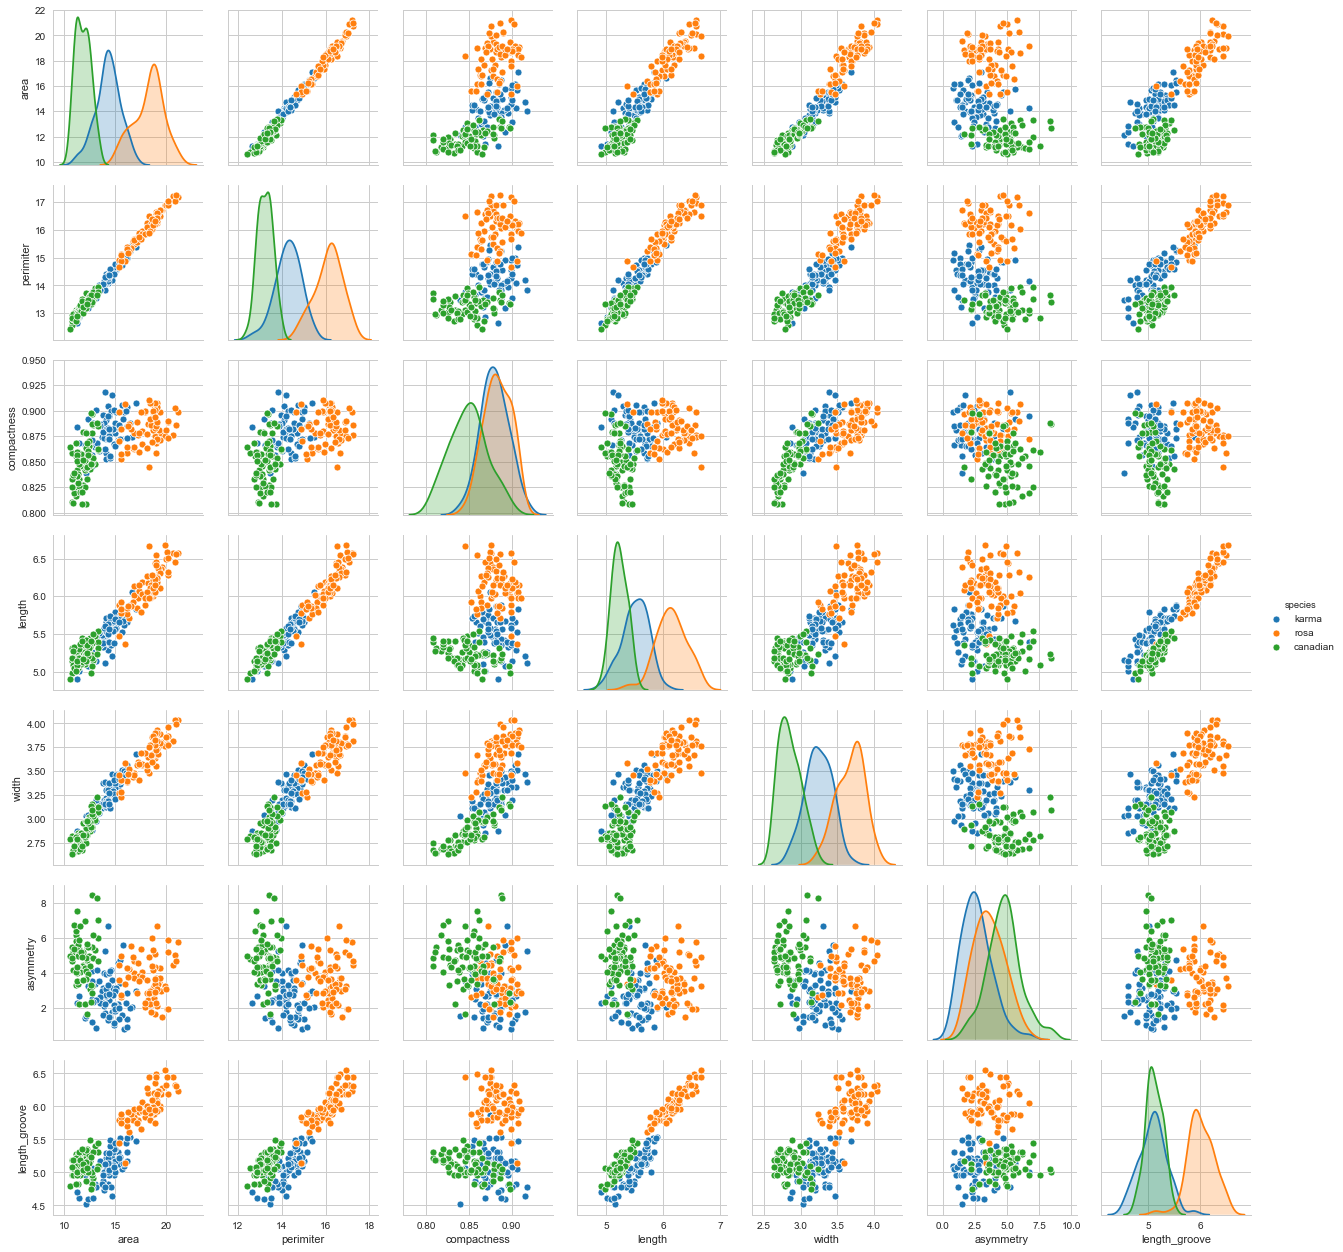

In [11]:
sns.pairplot(seeds, hue="species")

In [12]:
def fit_ml_algo(algo, X_train, Y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, Y_train)
    acc = round(model.score(X_test, Y_test) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  Y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(Y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

# Classification: All VARIATES

In [13]:
X = seedsVars
Y = seeds.species

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=10)

In [15]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Test Accuracy: 97.62
Accuracy CV 10-Fold: 91.07


In [16]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Test Accuracy: 95.24
Accuracy CV 10-Fold: 86.9


In [17]:
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Test Accuracy: 100.0
Accuracy CV 10-Fold: 92.86


In [18]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Test Accuracy: 95.24
Accuracy CV 10-Fold: 87.5


In [19]:
train_pred_gb, acc_gb, acc_cv_gb = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_gb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gb)

Test Accuracy: 97.62
Accuracy CV 10-Fold: 91.67


### Classification: NON-CORRELATED

In [20]:
X = seeds_subset
Y = seeds.species

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=10)

In [22]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Test Accuracy: 95.24
Accuracy CV 10-Fold: 88.69


In [23]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Test Accuracy: 92.86
Accuracy CV 10-Fold: 88.69


In [24]:
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Test Accuracy: 92.86
Accuracy CV 10-Fold: 86.31


In [25]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Test Accuracy: 92.86
Accuracy CV 10-Fold: 88.1


In [26]:
train_pred_gb, acc_gb, acc_cv_gb = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_gb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gb)

Test Accuracy: 100.0
Accuracy CV 10-Fold: 89.29


# Principal Component Analysis

The goal of this analysis is to reduce the number of explanatory variables to a smaller number of principal components.

Based on the plots previously, it appears that the species of kernels tend to cluster together pretty well.

In [32]:
from sklearn.preprocessing import StandardScaler

X = seedsVars
X = StandardScaler().fit_transform(X)
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [37]:
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf

,principal component 1,principal component 2,species
0,0.317047,0.783669,karma
1,-0.003386,1.913214,karma
2,-0.459443,1.907225,karma
3,-0.591936,1.931069,karma
4,1.102910,2.068090,karma
...,...,...,...
205,-1.991107,0.865956,canadian
206,-2.726865,-0.208190,canadian
207,-1.403633,-1.298593,canadian
208,-2.339328,0.099699,canadian


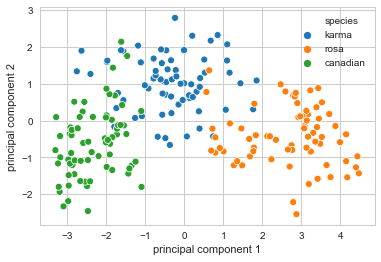

In [38]:
ax = sns.scatterplot(x="principal component 1", y="principal component 2", hue="species",
                     data=finalDf)

In [39]:
pca.explained_variance_ratio_

array([0.71874303, 0.17108184])

In [46]:
from sklearn.preprocessing import StandardScaler

X = seedsVars
X = StandardScaler().fit_transform(X)
X

array([[ 1.42097769e-01,  2.15462437e-01,  6.06017918e-05, ...,
         1.41701823e-01, -9.86151745e-01, -3.83577423e-01],
       [ 1.11880257e-02,  8.22375713e-03,  4.28515270e-01, ...,
         1.97432229e-01, -1.78816620e+00, -9.22013487e-01],
       [-1.92066576e-01, -3.60200562e-01,  1.44238325e+00, ...,
         2.08047544e-01, -6.67479334e-01, -1.18919199e+00],
       ...,
       [-5.67570840e-01, -6.90247348e-01,  7.33948301e-01, ...,
        -7.06044846e-02,  3.07658816e+00, -7.18060432e-01],
       [-1.03608992e+00, -1.03564515e+00, -8.01701104e-01, ...,
        -1.12152071e+00, -6.81351965e-02, -7.42534799e-01],
       [-8.77620233e-01, -9.35863561e-01, -1.10234659e-01, ...,
        -7.55292327e-01,  1.29122264e+00, -7.03783718e-01]])

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])

In [61]:
finalDf = pd.concat([principalDf, Y], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,species
0,0.317047,0.783669,-0.631010,karma
1,-0.003386,1.913214,-0.669754,karma
2,-0.459443,1.907225,0.932489,karma
3,-0.591936,1.931069,0.499311,karma
4,1.102910,2.068090,0.056705,karma
...,...,...,...,...
205,-1.991107,0.865956,0.513303,canadian
206,-2.726865,-0.208190,-0.059059,canadian
207,-1.403633,-1.298593,2.905811,canadian
208,-2.339328,0.099699,-0.382515,canadian


Text(0.5, 0.92, 'PCA on the iris data set')

<Figure size 480x480 with 0 Axes>

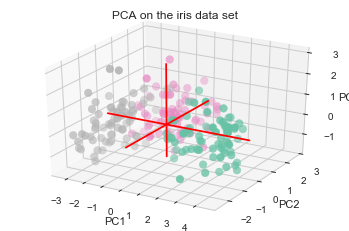

In [62]:
from mpl_toolkits.mplot3d import Axes3D 

my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)
 
# Keep the 'specie' column appart + make it numeric for coloring
finalDf['species']=pd.Categorical(finalDf['species'])
my_color=finalDf['species'].cat.codes
finalDf = finalDf.drop('species', 1)
 
# Run The PCA
pca = PCA(n_components=3)
pca.fit(finalDf)
 
# Store results of PCA in a data frame
result=pd.DataFrame(pca.transform(finalDf), columns=['PCA%i' % i for i in range(3)], index=finalDf.index)
 
# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(result['PCA0'], result['PCA1'], result['PCA2'], c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result['PCA0']), max(result['PCA0'])), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(result['PCA1']), max(result['PCA1'])), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(result['PCA2']), max(result['PCA2'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()


### Classification: PCA

In [47]:
X = finalDf
Y = seeds.species

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X , Y, test_size=0.2, random_state=10)

In [49]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Test Accuracy: 97.62
Accuracy CV 10-Fold: 89.88


In [50]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Test Accuracy: 95.24
Accuracy CV 10-Fold: 89.29


In [51]:
train_pred_svc, acc_svc, acc_cv_svc = fit_ml_algo(LinearSVC(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)

Test Accuracy: 92.86
Accuracy CV 10-Fold: 89.29


In [52]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Test Accuracy: 88.1
Accuracy CV 10-Fold: 87.5


In [53]:
train_pred_gb, acc_gb, acc_cv_gb = fit_ml_algo(GradientBoostingClassifier(), 
                                                               X_train, 
                                                               Y_train, 
                                                                    10)
print("Test Accuracy: %s" % acc_gb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gb)

Test Accuracy: 92.86
Accuracy CV 10-Fold: 87.5
